In [1]:
from time import time

start = time()

## Regex classifier

In [2]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
import re


#idea credit https://www.linkedin.com/pulse/regex-one-pattern-rule-them-all-find-bring-darkness-bind-carranza/
class RegexClassifier(BaseEstimator, RegressorMixin):
    """
    Language Classifier using Regular Expressions
    """

    language_regex_dict = {
        'el': r'([\u0370-\u03FF]+)\s?',  # Greek
        'en': r'([a-zA-Z]+)\s?',  # English
    }

    # STATIC INITALIZATION BLOCK
    # pre-compie all expressions to save execution time
    for lang in language_regex_dict.keys():
        language_regex_dict[lang] = re.compile(language_regex_dict[lang])


    def __init__(self, include_greeklish=True):
        """
        Initialize a new :class:`RegexClassifier` instance.

        :param include_greeklish: Optional. If True, include Greeklish in the language identification process.
        """
        self.include_greeklish = include_greeklish

    def predict(self, x):
        preds = []

        for text in x:
            pred = "other"

            if self.include_greeklish and \
                re.search(RegexClassifier.language_regex_dict["el"], text) and \
                re.search(RegexClassifier.language_regex_dict["en"], text):
                    pred = "greeklish"

            for lang_code, regex_pattern in RegexClassifier.language_regex_dict.items():
                match = re.search(regex_pattern, text)
                if match:
                    pred = lang_code
                    break
            preds.append(pred)
        return np.array(preds)
    
    def fit(self, x, y):
        return self

In [3]:
# Example usage
user_input_text = ["‰Ω†Â•ΩÔºå„Åì„Çå„ÅØ„Çµ„É≥„Éó„É´„Åß„Åô„ÄÇÏïàÎÖïÌïòÏÑ∏Ïöî", "this is an english sentence", "Œ¥ŒµŒΩ Œ±ŒΩœÑŒµœáœâ Œ±ŒªŒªŒø"]
detected_language = RegexClassifier().predict(user_input_text)
print(f"Detected Language Code: {detected_language}")

Detected Language Code: ['other' 'en' 'el']


## Defining the Gold Standard


### Greek-English identification dataset

https://aclanthology.org/L06-1229/
https://aclanthology.org/L04-1369/
https://huggingface.co/datasets/papluca/language-identification

In [4]:
import pandas as pd


def dataset_to_pd(dataset_dict: dict) -> pd.DataFrame:
    df_ls = []
    label_array = np.empty(shape=(sum([len(dataset) for dataset in dataset_dict.values()])), dtype=object)
    last_idx = -1

    for label, dataset in dataset_dict.items():
        new_last_idx = len(dataset) + last_idx
        label_array.put(np.arange(last_idx+1, new_last_idx+1, 1), label)
        last_idx = new_last_idx

        df_ls.append(pd.DataFrame(dataset))

    full_df = pd.concat(df_ls, ignore_index=True)
    full_df["set"] = label_array
    full_df.insert(0, "set", full_df.pop("set"))

    return full_df

In [5]:
from datasets import load_dataset


dataset_dict = load_dataset("papluca/language-identification")
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 70000
    })
    validation: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 10000
    })
})

In [6]:
lang_df = dataset_to_pd(dataset_dict)
lang_df

set labels                                               text
0      train     pt  os chefes de defesa da est√≥nia, let√≥nia, litu√¢...
1      train     bg  —Ä–∞–∑–º–µ—Ä—ä—Ç –Ω–∞ —Ö–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª–Ω–∞—Ç–∞ –º—Ä–µ–∂–∞ –º–æ–∂–µ –¥–∞ –±—ä–¥–µ ...
2      train     zh  ÂæàÂ•ΩÔºå‰ª•Ââç‰ªé‰∏çÂéªËØÑ‰ª∑Ôºå‰∏çÁü•ÈÅìÊµ™Ë¥π‰∫ÜÂ§öÂ∞ëÁßØÂàÜÔºåÁé∞Âú®Áü•ÈÅìÁßØÂàÜÂèØ‰ª•Êç¢Èí±ÔºåÂ∞±Ë¶ÅÂ•ΩÂ•ΩËØÑ‰ª∑‰∫ÜÔºåÂêéÊù•ÊàëÂ∞±Êää...
3      train     th  ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö ‡∏Ç‡∏≠‡∏á‡πÄ‡∏Å‡πà‡∏≤ ‡∏ó‡∏µ‡πà ‡∏à‡∏£‡∏¥‡∏á‡∏à‡∏±‡∏á ‡∏•‡∏≠‡∏á   honeychurch  ...
4      train     ru                             –û–Ω —É–≤–µ–ª–∏—á–∏–ª –¥–∞–≤–ª–µ–Ω–∏–µ .
...      ...    ...                                                ...
89995   test     zh                               Âè≤ÊñôÂæàÂÖÖÂàÜÔºåÂØπÂ≤∏ÁöÑÂæàÂ§öËßÇÁÇπ‰∏éÂ§ßÈôÜËø•ÂºÇÂïä„ÄÇ
89996   test     tr  √ñrneƒüin, te≈ühis Yunanca bir kelimeden alƒ±ndƒ± (...
89997   test     vi  N·∫øu lite/light ch·ªâ ƒë∆°n gi·∫£n l√† m√¥ t·∫£ m·ªôt ƒë·∫∑c t...
89998   test     bg  –ù–∞–ø—Ä–∏–º–µ—Ä, –µ–¥–Ω–∞ —â–∞—Ç—Å–∫–∞ —Å—Ç–æ–ª–∏—Ü–∞, –∫–æ—è—Ç–æ –ø–æ—Å–µ—Ç–∏—Ö–º–µ...
89999   test     pl                   Mam dla ciebie kilka propozycji:

[90000 rows x 3 columns]

In [7]:
en_gr_cond = lang_df.labels.eq("el") | lang_df.labels.eq("en")
en_gr_df = lang_df.loc[en_gr_cond, ["labels", "text"]]
en_gr_df

labels                                               text
18        el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
39        en                    Didnt really seem to work much.
40        el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
49        en  Highly recommend for those who don't like bein...
75        el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...      ...                                                ...
89961     en  It's super cute, really soft. Print is fine bu...
89965     en  One of them worked, the other one didn't. Ther...
89978     en   I only received one out of the three strikers :(
89982     el  ŒüŒπ ŒøœÅŒ≥Œ±ŒΩŒπœÉŒºŒøŒØ œÄœÅŒ≠œÄŒµŒπ ŒΩŒ± ŒµŒØŒΩŒ±Œπ œÉŒµ Œ∏Œ≠œÉŒ∑ ŒΩŒ± ŒºŒµœÑœÅŒÆ...
89986     el  Œ§Œø Abeam ŒºŒµ œÑŒ∑ŒΩ Arabella, Œ±œÄŒ≠ŒΩŒ±ŒΩœÑŒπ Œ±œÄœå œÑŒø ŒªŒπŒºŒ¨...

[9000 rows x 2 columns]

In [8]:
others_df = lang_df.loc[~en_gr_cond, ["labels", "text"]]
others_df = others_df.sample(15000)
others_df.labels = "other"
others_df

labels                                               text
65209  other        Czarno-bia≈Ça, rogata krowa stojƒÖca na polu.
69250  other  Ne pas commander ils me disent que j'ai re√ßu a...
57136  other  Da wir im Baumarkt nicht f√ºndig geworden sind ...
26342  other  ÿ≠ÿ∂Ÿàÿ± ŸÜ€í ÿßÿ≥ ÿ∑ÿ±ÿ≠ ⁄©€å ÿ≠ŸÖÿß€åÿ™ ÿ¥ÿ±Ÿàÿπ ⁄©€å €Å€í ÿ¨Ÿà ⁄©€Å ŸÜ€åŸà ÿ¨...
73971  other      hab aus versehen reklamiert und neue bestellt
...      ...                                                ...
21570  other  –†–µ—Å–ø—É–±–ª–∏–∫–∞–Ω—Ü—ã –Ω–µ —Ö–æ—Ç—è—Ç –æ—Å–ø–∞—Ä–∏–≤–∞—Ç—å —Ç–∏—Ä–∞–Ω–∏–∏ –∑–∞–∫–æ...
18227  other  Dans la description il est √©crit 10 couleurs d...
42430  other  Chefe dos direitos das Na√ß√µes Unidas pressiona...
17399  other  But i ' m proud though that that you know i , ...
31880  other  ⁄©€Å ⁄©Ÿæÿ™ÿßŸÜ ⁄©€å ÿ∫€åÿ±ŸÖŸàÿ¨ŸàÿØ⁄Ø€å ŸÖ€å⁄∫ ⁄©Ÿæÿ™ÿßŸÜ€å ⁄©€í ŸÅÿ±ÿßÿ¶ÿ∂ ÿßÿ≥ÿ™...

[15000 rows x 2 columns]

In [9]:
gold1_df = pd.concat([en_gr_df, others_df], axis=0, ignore_index=True, copy=False)
gold1_df

labels                                               text
0         el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
1         en                    Didnt really seem to work much.
2         el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
3         en  Highly recommend for those who don't like bein...
4         el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...      ...                                                ...
23995  other  –†–µ—Å–ø—É–±–ª–∏–∫–∞–Ω—Ü—ã –Ω–µ —Ö–æ—Ç—è—Ç –æ—Å–ø–∞—Ä–∏–≤–∞—Ç—å —Ç–∏—Ä–∞–Ω–∏–∏ –∑–∞–∫–æ...
23996  other  Dans la description il est √©crit 10 couleurs d...
23997  other  Chefe dos direitos das Na√ß√µes Unidas pressiona...
23998  other  But i ' m proud though that that you know i , ...
23999  other  ⁄©€Å ⁄©Ÿæÿ™ÿßŸÜ ⁄©€å ÿ∫€åÿ±ŸÖŸàÿ¨ŸàÿØ⁄Ø€å ŸÖ€å⁄∫ ⁄©Ÿæÿ™ÿßŸÜ€å ⁄©€í ŸÅÿ±ÿßÿ¶ÿ∂ ÿßÿ≥ÿ™...

[24000 rows x 2 columns]

### Greek-Greeklish identification dataset

In [10]:
head_url = "https://forum.warmane.com"
warmane_url = "https://forum.warmane.com/forumdisplay.php?f=20"

In [11]:
from src.util import fetch_soup
from tasks.warmane import parse_warmane_thread
from tqdm import tqdm


threads = []

for page in range(1, 9):
    url = warmane_url + f"&page={page}"
    soup = fetch_soup(url)

    print(f"Processing page {page} of 8...")
    thread_tags = soup.find_all("li", {"class": "threadbit"})
    for thread_tag in tqdm(thread_tags):
        thread = parse_warmane_thread(head_url, thread_tag)
        threads.append(thread)

Processing page 1 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:04<00:00,  4.20it/s]


Processing page 2 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.54it/s]


Processing page 3 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.50it/s]


Processing page 4 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.14it/s]


Processing page 5 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.18it/s]


Processing page 6 of 8...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.35it/s]


Processing page 7 of 8...


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                | 12/20 [00:02<00:01,  5.18it/s]

ERROR: Failed to get information on post  https://forum.warmane.com/showthread.php?t=272585


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:03<00:00,  5.40it/s]


Processing page 8 of 8...


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                               | 5/8 [00:00<00:00,  5.10it/s]

ERROR: Failed to get information on post  https://forum.warmane.com/showthread.php?t=278731


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8/8 [00:01<00:00,  5.17it/s]


In [12]:
import itertools

# flatten nested lists 
posts = set(itertools.chain.from_iterable([thread.posts for thread in threads]))
len(posts)

414

In [13]:
import pandas as pd

warmane_df = pd.DataFrame.from_records([post.__dict__ for post in posts], index="id")
warmane_df.reply_to = warmane_df.reply_to.fillna(-1).astype(int)
warmane_df

thread_id           author  \
id                                    
2926596     384475           Ripsin   
2473988     300013           v4gflo   
2420747     290921          AlexPan   
2981903     399822  xAchillesGate4x   
2879517     371804            Csdas   
...            ...              ...   
2877428     353812        Shiverbro   
3069941     423611  crystallenia898   
2801654     350071      Draculation   
2873339     370241           Ripsin   
2410495     289030          boolouk   

                                                  contents       date  \
id                                                                      
2926596  Kalhspera paides,\n\r\nEimai arketo kairo ston... 2018-05-22   
2473988  geia sas.psaxnw ellhniko guild ston Deathwing ... 2015-06-17   
2420747  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \... 2015-03-24   
2981903  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin... 2019-03-03   
2879517  Opoios gnwrizei kati as mou kanei /w Dremoria ... 2017-11-29   
...                                                    ...        ...   
2877428       kalos private aksizei na ksekiniseis paidia? 2017-11-21   
3069941  Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº... 2020-07-26   
2801654                                   Bump! ICC25 6/12 2017-05-07   
2873339  Kalhspera tha ithela na rwthsw an kapoios gnwr... 2017-11-07   
2410495  ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ... 2015-03-13   

         reply_to  
id                 
2926596        -1  
2473988        -1  
2420747        -1  
2981903        -1  
2879517        -1  
...           ...  
2877428   2875915  
3069941   3068345  
2801654   2795443  
2873339        -1  
2410495   2409274  

[414 rows x 5 columns]

In [14]:
empty_contents = warmane_df.contents.apply(lambda x: x.isspace() | len(x)==0)
warmane_df[empty_contents]

thread_id     author contents       date  reply_to
id                                                         
3082464     427259  malakas17          2020-10-20   3081822
3113236     427259  malakas17          2021-05-12   3113009
3099161     431660  malakas17          2021-02-10   3096432
3113819     427259  malakas17          2021-05-16   3113236
3099593     427259    boonick          2021-02-14   3093400
3081820     427259  malakas17          2020-10-16   3080427
3081822     427259  malakas17          2020-10-16   3081820

In [15]:
warmane_df = warmane_df[~empty_contents]

In [16]:
regex_model = RegexClassifier(include_greeklish=False)
preds = regex_model.predict(warmane_df.contents)

In [17]:
warmane_df[preds=="en"].contents

id
2926596    Kalhspera paides,\n\r\nEimai arketo kairo ston...
2473988    geia sas.psaxnw ellhniko guild ston Deathwing ...
2879517    Opoios gnwrizei kati as mou kanei /w Dremoria ...
2959390               Bubblethesap Icecrown wotlk horde belf
2947119    den se vrisko kane add evvi  .\nmou leei den u...
                                 ...                        
2557881                          Paokara einai padou file :P
2602989    Me to plevro ton Allience ayti ti fora Oi <<An...
2877428         kalos private aksizei na ksekiniseis paidia?
2801654                                     Bump! ICC25 6/12
2873339    Kalhspera tha ithela na rwthsw an kapoios gnwr...
Name: contents, Length: 227, dtype: object

In [18]:
warmane_df[preds=="greeklish"].contents

Series([], Name: contents, dtype: object)

In [19]:
warmane_df[preds=="el"].contents

id
2420747    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \...
2981903    ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin...
2959391    ŒöŒ±ŒªŒ∑œÉœÄŒµœÅŒ± Œ∏Œ± œÄŒ±œÇ œÉœÑŒπœÇ ŒπŒ¥ŒπœåœÑŒ∑œÑŒµœÇ (properties) œÉ...
2719776    Originally Posted by celphecil\n\nŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± Œ£œâ...
2971700    ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œø guild , œàŒ±œáŒΩŒøœÖŒºŒµ Œ±œÑŒøŒºŒ± Œ≥ŒπŒ± runs ICC10...
                                 ...                        
2609122    œÄœéœÅœâœÉŒ∑ ŒºŒµ œÑŒ± ŒºŒπœÉŒ¨ Dung, Quests Œ∫Œ±Œπ Raids bugge...
2707437    ŒõŒøŒπœÄœåŒΩ ŒºŒ±Œ≥ŒµœÇ,ŒæŒ≠œÅŒµŒπ Œ∫Œ¨œÄŒøŒπŒøœÇ Œ≥ŒπŒ±œÑŒØ Œ¥ŒµŒΩ Œ≥ŒØŒΩŒµœÑŒ±Œπ ŒΩ...
2777071    INACTIVE\n\n\n <Northern Defiance>  ŒöŒ±ŒπŒΩŒøœçœÅŒ≥ŒπŒ±...
3069941    Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº...
2410495    ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ...
Name: contents, Length: 180, dtype: object

In [20]:
labels = np.where(preds=="en", "greeklish", "el")
gold2_df = pd.DataFrame({"labels": labels, "text": warmane_df.contents})
gold2_df

labels                                               text
id                                                                   
2926596  greeklish  Kalhspera paides,\n\r\nEimai arketo kairo ston...
2473988  greeklish  geia sas.psaxnw ellhniko guild ston Deathwing ...
2420747         el  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒπŒ¥ŒπŒ¨, œÑŒø œÄœÅœåŒ≤ŒªŒ∑ŒºŒ± ŒµŒØŒΩŒ±Œπ œÑŒø ŒµŒæŒÆœÇ. \...
2981903         el  ŒöŒ±ŒªŒ∑œÉœÄŒ≠œÅŒ± œÄŒ±ŒØŒ¥ŒµœÇ. Œ®Œ¨œáŒΩœâ ŒïŒªŒªŒ∑ŒΩŒπŒ∫œå active raidin...
2879517  greeklish  Opoios gnwrizei kati as mou kanei /w Dremoria ...
...            ...                                                ...
2877428  greeklish       kalos private aksizei na ksekiniseis paidia?
3069941         el  Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº...
2801654  greeklish                                   Bump! ICC25 6/12
2873339  greeklish  Kalhspera tha ithela na rwthsw an kapoios gnwr...
2410495         el  ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ...

[407 rows x 2 columns]

In [21]:
gold_df = pd.concat([gold1_df, gold2_df])
gold_df

labels                                               text
0               el  Œ†Œ±œÅŒ¨ œÑŒøŒΩ ŒµŒ±œÖœÑœå ŒºŒøœÖ , Œ∑ Œ≥ŒΩœéŒºŒ∑ ŒºŒøœÖ Œ≥ŒπŒ± œÑŒ∑ œÉœçŒΩŒµœÉŒ∑...
1               en                    Didnt really seem to work much.
2               el  ŒëŒ∫œåŒºŒ± Œ∫Œ±Œπ œÑŒø ŒΩŒ± ŒæŒ≠œÅŒµŒπœÇ œåœÑŒπ ŒÆœÑŒ±ŒΩ Œ≠ŒΩŒ± Œ¨Œ≥Œ±ŒªŒºŒ± œÄŒøœÖ...
3               en  Highly recommend for those who don't like bein...
4               el                       Œàœáœâ Œ∫Œ¨ŒΩŒµŒπ œÑŒ≠œÉœÉŒµœÅŒπœÇ ŒÆ œÄŒ≠ŒΩœÑŒµ .
...            ...                                                ...
2877428  greeklish       kalos private aksizei na ksekiniseis paidia?
3069941         el  Œï ŒºŒµŒπœÇ Œ±œÖŒæŒ±ŒΩœåŒºŒ±œÉœÑŒµ Œ∫Œ±Œπ Œ∏Œ± Œ±œÅœáŒØœÉŒøœÖŒºŒµ ŒΩŒ± œÉœÑŒÆŒΩŒøœÖŒº...
2801654  greeklish                                   Bump! ICC25 6/12
2873339  greeklish  Kalhspera tha ithela na rwthsw an kapoios gnwr...
2410495         el  ŒïŒºœÄŒµŒπœÅŒπŒ± Œµœáœâ, Œ±ŒªŒªŒ± Œ¥ŒµŒΩ Œµœáœâ œáœÅŒøŒΩŒø...Œ±œÖœÑŒø ŒµŒπŒΩŒ±Œπ ...

[24407 rows x 2 columns]

In [22]:
import os


OUTPUT_DIR = "output"

def csv_output(df: pd.DataFrame, filename: str) -> None:
    file = os.path.join(OUTPUT_DIR, filename)
    df.to_csv(file)
    print(f"File saved successfully as {file}")

In [23]:
csv_output(gold_df, "gold.csv")

File saved successfully as output\gold.csv


## Youtube Crawling

In [25]:
from src.crawling import meDriverManager, jupyter_options


ChromeDriverManager.set_options(jupyter_options())

In [26]:
from tasks.youtube import scrape_youtube, extract_search_results, extract_comments


# "greek songs" search in Greek
search_url = "https://www.youtube.com/results?search_query=%CE%B5%CE%BB%CE%BB%CE%B7%CE%BD%CE%B9%CE%BA%CE%B1+%CF%84%CF%81%CE%B1%CE%B3%CE%BF%CF%85%CE%B4%CE%B9%CE%B1"
search_soup = scrape_youtube(ChromeDriverManager.get(), search_url, max_scrolls=10, verbose=True)

Scrolling (0 out of max 10)...
Scrolling (1 out of max 10)...
Scrolling (2 out of max 10)...
Scrolling (3 out of max 10)...
Scrolling (4 out of max 10)...
Scrolling (5 out of max 10)...
Scrolling (6 out of max 10)...
Scrolling (7 out of max 10)...
Scrolling (8 out of max 10)...
Scrolling (9 out of max 10)...
Scrolling (10 out of max 10)...


In [27]:
results = extract_search_results(search_soup)
results_df = pd.DataFrame({"title": results[0], "link": results[1]})
results_df

title  \
0    \n\nŒ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠...   
1    \n\nGreek Hits 2023 | Non-Stop Mix by Elegant ...   
2    \n\nŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Mu...   
3    \n\nAnastasia - Omorfi | ŒëŒΩŒ±œÉœÑŒ±œÉŒØŒ± - ŒåŒºŒøœÅœÜŒ∑ (O...   
4    \n\nGreek Ultra Hits Non Stop Mix By Nikos Hal...   
..                                                 ...   
223  \n\nŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ Œ†Œ±ŒπŒ¥ŒπŒ∫Œ¨ Œ§œÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± | Paidika Trago...   
224  \n\nŒßœÅŒÆœÉœÑŒøœÇ ŒúŒµŒΩŒπŒ¥ŒπŒ¨œÑŒ∑œÇ ‚Äì ŒëœÄœå Œ£ŒÆŒºŒµœÅŒ± | Official...   
225  \n\nœÄŒ±ŒπŒ¥ŒπŒ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± | ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ ŒßœÅŒπœÉœÑŒøœÖŒ≥ŒµŒΩŒΩŒπŒ¨œÑ...   
226  \n\nStavento feat. ŒâŒ≤Œ∑ ŒëŒ¥Œ¨ŒºŒøœÖ - ŒìŒπŒ± Œ£Œ≠ŒΩŒ± (Offi...   
227  \n\nŒìŒªœÖŒ∫ŒµœÅŒØŒ± - 60 Œ°ŒµŒºœÄŒ≠œÑŒπŒ∫Œ± & Œ£ŒºœÖœÅŒΩŒ≠ŒπŒ∫Œ± | Glyk...   

                                                  link  
0    /watch?v=OdX0y96UPEA&pp=ygUjzrXOu867zrfOvc65zr...  
1    /watch?v=RcSAggke-_U&pp=ygUjzrXOu867zrfOvc65zr...  
2    /watch?v=sTyGh6edBRQ&pp=ygUjzrXOu867zrfOvc65zr...  
3    /watch?v=f8wpmLCmbas&pp=ygUjzrXOu867zrfOvc65zr...  
4    /watch?v=KhCU68Eok9E&pp=ygUjzrXOu867zrfOvc65zr...  
..                                                 ...  
223  /watch?v=E4_rZaXZlDo&pp=ygUjzrXOu867zrfOvc65zr...  
224  /watch?v=6-UiKOxBXc8&pp=ygUjzrXOu867zrfOvc65zr...  
225  /watch?v=CoFLfM4beq4&pp=ygUjzrXOu867zrfOvc65zr...  
226  /watch?v=mYkJ-Hrw1LA&pp=ygUjzrXOu867zrfOvc65zr...  
227  /watch?v=69sMDD6JaAU&pp=ygUjzrXOu867zrfOvc65zr...  

[228 rows x 2 columns]

In [28]:
results_df.title = results_df.title.apply(lambda x: x.strip())
results_df.link = results_df.link.apply(lambda x: "https://www.youtube.com" + x) 
results_df

title  \
0    Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
1    Greek Hits 2023 | Non-Stop Mix by Elegant Gree...   
2    ŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Music ...   
3    Anastasia - Omorfi | ŒëŒΩŒ±œÉœÑŒ±œÉŒØŒ± - ŒåŒºŒøœÅœÜŒ∑ (Offic...   
4    Greek Ultra Hits Non Stop Mix By Nikos Halkous...   
..                                                 ...   
223     ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ Œ†Œ±ŒπŒ¥ŒπŒ∫Œ¨ Œ§œÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± | Paidika Tragoudia   
224  ŒßœÅŒÆœÉœÑŒøœÇ ŒúŒµŒΩŒπŒ¥ŒπŒ¨œÑŒ∑œÇ ‚Äì ŒëœÄœå Œ£ŒÆŒºŒµœÅŒ± | Official Mus...   
225  œÄŒ±ŒπŒ¥ŒπŒ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± | ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ ŒßœÅŒπœÉœÑŒøœÖŒ≥ŒµŒΩŒΩŒπŒ¨œÑŒπŒ∫Œ± ...   
226  Stavento feat. ŒâŒ≤Œ∑ ŒëŒ¥Œ¨ŒºŒøœÖ - ŒìŒπŒ± Œ£Œ≠ŒΩŒ± (Official...   
227  ŒìŒªœÖŒ∫ŒµœÅŒØŒ± - 60 Œ°ŒµŒºœÄŒ≠œÑŒπŒ∫Œ± & Œ£ŒºœÖœÅŒΩŒ≠ŒπŒ∫Œ± | Glykeria...   

                                                  link  
0    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...  
1    https://www.youtube.com/watch?v=RcSAggke-_U&pp...  
2    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...  
3    https://www.youtube.com/watch?v=f8wpmLCmbas&pp...  
4    https://www.youtube.com/watch?v=KhCU68Eok9E&pp...  
..                                                 ...  
223  https://www.youtube.com/watch?v=E4_rZaXZlDo&pp...  
224  https://www.youtube.com/watch?v=6-UiKOxBXc8&pp...  
225  https://www.youtube.com/watch?v=CoFLfM4beq4&pp...  
226  https://www.youtube.com/watch?v=mYkJ-Hrw1LA&pp...  
227  https://www.youtube.com/watch?v=69sMDD6JaAU&pp...  

[228 rows x 2 columns]

In [29]:
greeklish_model = RegexClassifier(include_greeklish=True)
preds = greeklish_model.predict(results_df.title)
gr_res_df = results_df[(preds != "en") & (preds != None)]
gr_res_df

title  \
0    Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
2    ŒëŒΩœÑœéŒΩŒ∑œÇ Œ°Œ≠ŒºŒøœÇ - ŒßŒØŒªŒπŒ± Œ£œÄŒØœÅœÑŒ± - Official Music ...   
3    Anastasia - Omorfi | ŒëŒΩŒ±œÉœÑŒ±œÉŒØŒ± - ŒåŒºŒøœÅœÜŒ∑ (Offic...   
5    Œ†ŒøœÖŒªœåœÄŒøœÖŒªŒøœÇ, ŒúœÄŒ¨œÉŒ∑œÇ, ŒìŒªœÖŒ∫ŒµœÅŒØŒ±, ŒëŒΩŒ¥œÅŒµŒ¨œÑŒøœÇ, ŒúœÄŒ≠Œª...   
6    ŒúŒøœÖœÉŒπŒ∫ŒÆ ŒπœÉœÑŒøœÅŒØŒ± ŒùŒø.1 (ŒºŒ≠œÅŒøœÇ œÄœÅœéœÑŒø) - 100 œáœÅœÖœÉŒ¨...   
..                                                 ...   
223     ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ Œ†Œ±ŒπŒ¥ŒπŒ∫Œ¨ Œ§œÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± | Paidika Tragoudia   
224  ŒßœÅŒÆœÉœÑŒøœÇ ŒúŒµŒΩŒπŒ¥ŒπŒ¨œÑŒ∑œÇ ‚Äì ŒëœÄœå Œ£ŒÆŒºŒµœÅŒ± | Official Mus...   
225  œÄŒ±ŒπŒ¥ŒπŒ¨ œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± | ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ¨ ŒßœÅŒπœÉœÑŒøœÖŒ≥ŒµŒΩŒΩŒπŒ¨œÑŒπŒ∫Œ± ...   
226  Stavento feat. ŒâŒ≤Œ∑ ŒëŒ¥Œ¨ŒºŒøœÖ - ŒìŒπŒ± Œ£Œ≠ŒΩŒ± (Official...   
227  ŒìŒªœÖŒ∫ŒµœÅŒØŒ± - 60 Œ°ŒµŒºœÄŒ≠œÑŒπŒ∫Œ± & Œ£ŒºœÖœÅŒΩŒ≠ŒπŒ∫Œ± | Glykeria...   

                                                  link  
0    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...  
2    https://www.youtube.com/watch?v=sTyGh6edBRQ&pp...  
3    https://www.youtube.com/watch?v=f8wpmLCmbas&pp...  
5    https://www.youtube.com/watch?v=cOGip_clrKY&pp...  
6    https://www.youtube.com/watch?v=p5g82ta4sTk&pp...  
..                                                 ...  
223  https://www.youtube.com/watch?v=E4_rZaXZlDo&pp...  
224  https://www.youtube.com/watch?v=6-UiKOxBXc8&pp...  
225  https://www.youtube.com/watch?v=CoFLfM4beq4&pp...  
226  https://www.youtube.com/watch?v=mYkJ-Hrw1LA&pp...  
227  https://www.youtube.com/watch?v=69sMDD6JaAU&pp...  

[184 rows x 2 columns]

In [30]:
import bs4
import threading


def scrape_job(yt_url: str) -> tuple[str, bs4.BeautifulSoup]:
    try:
        result = scrape_youtube(ChromeDriverManager.get(), 
                                yt_url, 
                                scroll_wait_secs=2,
                                max_scrolls=15,
                                verbose=False)
    except Exception:
        result = None
    return yt_url, result

In [31]:
import concurrent.futures


jobs = 15
# get at most max_videos, if more videos were crawled during the search
max_videos = 150
urls = gr_res_df.link[:max_videos] if len(gr_res_df) > max_videos else gr_res_df

print("Scrapping comments...")
with concurrent.futures.ThreadPoolExecutor(max_workers=jobs) as executor:
    results = list(tqdm(executor.map(scrape_job, urls), total=len(urls)))

ChromeDriverManager.quit()

Scrapping comments...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 150/150 [04:51<00:00,  1.94s/it]


In [32]:
from tasks.youtube import extract_comments


scraped_urls = []
comments = []
dates = []

for url, result in results:
    if result is not None:
        new_comments, new_dates = extract_comments(result)
        comments += new_comments
        dates += new_dates
        scraped_urls += ([url] * len(new_comments))

In [63]:
comments_df = pd.DataFrame({"link": scraped_urls, "text": comments, "date": dates})
comments_df

link  \
0     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
1     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
2     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
3     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
4     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
...                                                 ...   
1405  https://www.youtube.com/watch?v=20EaBkhFqI8&pp...   
1406  https://www.youtube.com/watch?v=20EaBkhFqI8&pp...   
1407  https://www.youtube.com/watch?v=20EaBkhFqI8&pp...   
1408  https://www.youtube.com/watch?v=20EaBkhFqI8&pp...   
1409  https://www.youtube.com/watch?v=20EaBkhFqI8&pp...   

                                                   text  \
0                              Œ•œÄŒ≠œÅŒøœáŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± ŒºœÄœÅŒ¨Œ≤Œø   
1                       Œ©œÅŒ±ŒØŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±!! ŒöŒ±ŒªŒÆ ŒµœÄŒπŒªŒøŒ≥ŒÆ!   
2                      ŒåœÑŒπ Œ±ŒæŒØŒ∂ŒµŒπ ŒµŒØŒΩŒ±Œπ œÄŒ¨ŒΩœÑŒ± Œ∫ŒøŒΩœÑŒ¨ œÉŒøœÖ   
3              ŒöŒëŒõŒóŒúŒïŒ°Œë,Œ•Œ†ŒïŒ°ŒüŒßŒë Œ§Œ°ŒëŒìŒüŒ•ŒîŒôŒë,ŒúŒ†Œ°ŒëŒíŒü..!!!!!   
4                            ŒåœÑŒπ ŒµŒØŒΩŒ±Œπ Œ¥ŒπŒ∫œå œÉŒøœÖ Œ≥œÖœÅŒØŒ∂ŒµŒπ   
...                                                 ...   
1405   ŒïŒ∫œÄŒªŒ∑Œ∫œÑŒπŒ∫Œ≠œÇ ŒµœÄŒπŒªŒøŒ≥Œ≠œÇ,  ŒºŒ±Œ≥ŒµœÖœÑŒπŒ∫ŒµŒµŒµœÇ 1000 ŒºœÄœÅŒ¨Œ≤Œø    
1406                    ŒåŒºŒøœÅœÜŒµœÇ ŒµœÄŒπŒªŒøŒ≥Œ≠œÇ Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ± œåŒªŒ±    
1407                                           Œ•œÄŒ≠œÅŒøœáŒø    
1408  ŒåœÉŒøŒπ ŒºŒπŒªŒøœçŒΩ ŒªŒØŒ≥Œø Œ±Œ∫ŒøœçŒ≥ŒøŒΩœÑŒ±Œπ Œ¥œçŒø œÜŒøœÅŒ≠œÇ œÄŒµœÅŒπœÉœÉœåœÑ...   
1409                                      ŒüŒΩŒµŒπœÅŒµŒºŒ≠ŒΩŒø!!    

                           date  
0    2022-11-25 11:50:59.010531  
1    2022-11-25 11:50:59.015417  
2    2021-11-25 11:50:59.018419  
3    2021-11-25 11:50:59.021437  
4    2021-11-25 11:50:59.024474  
...                         ...  
1405 2022-11-25 11:51:07.001769  
1406 2022-11-25 11:51:07.004803  
1407 2022-11-25 11:51:07.007796  
1408 2023-04-25 11:51:07.012855  
1409 2022-11-25 11:51:07.015841  

[1410 rows x 3 columns]

In [64]:
comments_df.date = comments_df.date.apply(lambda x: x.date() if x is not None else None)

preds = greeklish_model.predict(comments_df.text)
mask = ((preds != "el") & (preds != "greeklish"))
comments_df[mask]

link  \
5     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
7     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
9     https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
11    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
13    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
...                                                 ...   
1368  https://www.youtube.com/watch?v=eGGWmivIHYQ&pp...   
1377  https://www.youtube.com/watch?v=Vgdc_7nDPqI&pp...   
1386  https://www.youtube.com/watch?v=c2qFbcDRCV8&pp...   
1395  https://www.youtube.com/watch?v=SFTvzvefR04&pp...   
1404  https://www.youtube.com/watch?v=20EaBkhFqI8&pp...   

                                                   text        date  
5                                                        2021-11-25  
7     Greece established in 1999 by British\nLong li...  2022-11-25  
9                                         üá¨üá∑üá¨üá∑üá¨üá∑üá¨üá∑üá¨üá∑üá¨üá∑Ô∏è  2021-11-25  
11                                                       2021-11-25  
13     My dream is to date and marry a Greek girl woman  2022-11-25  
...                                                 ...         ...  
1368                                                üá¨üá∑Ô∏è  2023-02-25  
1377                                                üá¨üá∑Ô∏è  2023-02-25  
1386                                                üá¨üá∑Ô∏è  2023-02-25  
1395                                                üá¨üá∑Ô∏è  2023-02-25  
1404                                                üá¨üá∑Ô∏è  2023-02-25  

[567 rows x 3 columns]

In [65]:
crawl_df = pd.merge(gr_res_df, comments_df[~mask], how="inner", on="link")
crawl_df

title  \
0    Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
1    Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
2    Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
3    Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
4    Œ†ŒøœÖ 'ŒΩŒ±Œπ œÑŒ± œáœÅœåŒΩŒπŒ± ! - 40 Œ±Œ∏Œ¨ŒΩŒ±œÑŒ±, Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ±, ...   
..                                                 ...   
862  ŒàœáŒµŒπœÇ œÑŒø œáœÅœéŒºŒ± œÑŒøœÖ ŒüœÖœÅŒ±ŒΩŒøœç | ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ≠œÇ ŒúœÄŒ±ŒªŒ¨ŒΩœÑ...   
863  ŒàœáŒµŒπœÇ œÑŒø œáœÅœéŒºŒ± œÑŒøœÖ ŒüœÖœÅŒ±ŒΩŒøœç | ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ≠œÇ ŒúœÄŒ±ŒªŒ¨ŒΩœÑ...   
864  ŒàœáŒµŒπœÇ œÑŒø œáœÅœéŒºŒ± œÑŒøœÖ ŒüœÖœÅŒ±ŒΩŒøœç | ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ≠œÇ ŒúœÄŒ±ŒªŒ¨ŒΩœÑ...   
865  ŒàœáŒµŒπœÇ œÑŒø œáœÅœéŒºŒ± œÑŒøœÖ ŒüœÖœÅŒ±ŒΩŒøœç | ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ≠œÇ ŒúœÄŒ±ŒªŒ¨ŒΩœÑ...   
866  ŒàœáŒµŒπœÇ œÑŒø œáœÅœéŒºŒ± œÑŒøœÖ ŒüœÖœÅŒ±ŒΩŒøœç | ŒïŒªŒªŒ∑ŒΩŒπŒ∫Œ≠œÇ ŒúœÄŒ±ŒªŒ¨ŒΩœÑ...   

                                                  link  \
0    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
1    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
2    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
3    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
4    https://www.youtube.com/watch?v=OdX0y96UPEA&pp...   
..                                                 ...   
862  https://www.youtube.com/watch?v=20EaBkhFqI8&pp...   
863  https://www.youtube.com/watch?v=20EaBkhFqI8&pp...   
864  https://www.youtube.com/watch?v=20EaBkhFqI8&pp...   
865  https://www.youtube.com/watch?v=20EaBkhFqI8&pp...   
866  https://www.youtube.com/watch?v=20EaBkhFqI8&pp...   

                                                  text        date  
0                             Œ•œÄŒ≠œÅŒøœáŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ± ŒºœÄœÅŒ¨Œ≤Œø  2022-11-25  
1                      Œ©œÅŒ±ŒØŒ± œÑœÅŒ±Œ≥ŒøœçŒ¥ŒπŒ±!! ŒöŒ±ŒªŒÆ ŒµœÄŒπŒªŒøŒ≥ŒÆ!  2022-11-25  
2                     ŒåœÑŒπ Œ±ŒæŒØŒ∂ŒµŒπ ŒµŒØŒΩŒ±Œπ œÄŒ¨ŒΩœÑŒ± Œ∫ŒøŒΩœÑŒ¨ œÉŒøœÖ  2021-11-25  
3             ŒöŒëŒõŒóŒúŒïŒ°Œë,Œ•Œ†ŒïŒ°ŒüŒßŒë Œ§Œ°ŒëŒìŒüŒ•ŒîŒôŒë,ŒúŒ†Œ°ŒëŒíŒü..!!!!!  2021-11-25  
4                           ŒåœÑŒπ ŒµŒØŒΩŒ±Œπ Œ¥ŒπŒ∫œå œÉŒøœÖ Œ≥œÖœÅŒØŒ∂ŒµŒπ  2021-11-25  
..                                                 ...         ...  
862   ŒïŒ∫œÄŒªŒ∑Œ∫œÑŒπŒ∫Œ≠œÇ ŒµœÄŒπŒªŒøŒ≥Œ≠œÇ,  ŒºŒ±Œ≥ŒµœÖœÑŒπŒ∫ŒµŒµŒµœÇ 1000 ŒºœÄœÅŒ¨Œ≤Œø   2022-11-25  
863                    ŒåŒºŒøœÅœÜŒµœÇ ŒµœÄŒπŒªŒøŒ≥Œ≠œÇ Œ±Œ≥Œ±œÄŒ∑ŒºŒ≠ŒΩŒ± œåŒªŒ±   2022-11-25  
864                                           Œ•œÄŒ≠œÅŒøœáŒø   2022-11-25  
865  ŒåœÉŒøŒπ ŒºŒπŒªŒøœçŒΩ ŒªŒØŒ≥Œø Œ±Œ∫ŒøœçŒ≥ŒøŒΩœÑŒ±Œπ Œ¥œçŒø œÜŒøœÅŒ≠œÇ œÄŒµœÅŒπœÉœÉœåœÑ...  2023-04-25  
866                                      ŒüŒΩŒµŒπœÅŒµŒºŒ≠ŒΩŒø!!   2022-11-25  

[867 rows x 4 columns]

In [66]:
sum(crawl_df.date == None)

0

In [67]:
csv_output(crawl_df, "crawl.csv")

File saved successfully as output\crawl.csv


## Language Identification

https://stats.stackexchange.com/questions/357466/are-unbalanced-datasets-problematic-and-how-does-oversampling-purport-to-he
https://gking.harvard.edu/files/abs/0s-abs.shtml
https://www.kaggle.com/code/residentmario/undersampling-and-oversampling-imbalanced-data


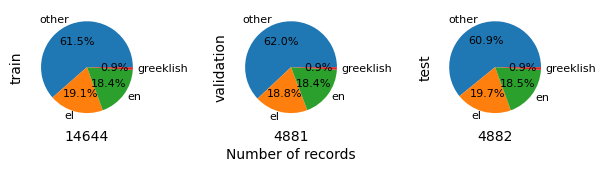

In [172]:
from src.ml import train_test_val_split


data_train, data_val, data_test = train_test_val_split(gold_df, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2,
                                                        random_state=42, stratify_col="labels")
# code block from Ioannis Pavlopoulos
axes = pd.DataFrame({"train": data_train.labels.value_counts(),
              "validation": data_val.labels.value_counts(),
              "test": data_test.labels.value_counts()}
            ).plot.pie(subplots=True, 
                       textprops={'fontsize': 8},
                       autopct=f'%1.1f%%', # print percent% results 
                       legend=False)

axes[0].set_xlabel(data_train.shape[0])
axes[1].set_xlabel(data_val.shape[0])
axes[2].set_xlabel(data_test.shape[0])

axes[1].text(0, -2, 'Number of records', ha='center')

plt.tight_layout(pad=2.0)
plt.show()

In [173]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


vectorizer = TfidfVectorizer().fit(data_train.text)
x_train = vectorizer.transform(data_train.text)
y_train = data_train.labels
x_test = vectorizer.transform(data_test.text)
y_test = data_test.labels

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((14644, 66832), (14644,), (4882, 66832), (4882,))

In [174]:
from sklearn.model_selection import cross_val_score


def cross_val_res(model, x, y, scoring=None, cv=10):
    if scoring is None:
        scoring = "f1_macro"
    res = cross_val_score(model, x, y, cv=cv, scoring=scoring)
    return res

### Dummy Classifier

In [175]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings


def get_statistics(y_test, y_pred):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        print(f"Macro F1: {f1_score(y_test, y_pred, average='macro', zero_division=0)}")
        print(classification_report(y_test, y_pred, zero_division=0))
        ConfusionMatrixDisplay.from_predictions(y_test, 
                                                y_pred, 
                                                colorbar=True)
        plt.show()

Macro F1: 0.1891633770533554
              precision    recall  f1-score   support

          el       0.00      0.00      0.00       962
          en       0.00      0.00      0.00       903
   greeklish       0.00      0.00      0.00        46
       other       0.61      1.00      0.76      2971

    accuracy                           0.61      4882
   macro avg       0.15      0.25      0.19      4882
weighted avg       0.37      0.61      0.46      4882



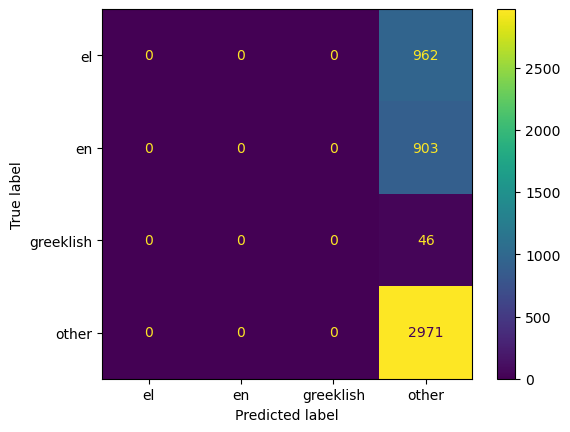

In [176]:
from sklearn.dummy import DummyClassifier, DummyRegressor


majority = DummyClassifier(strategy="most_frequent")
majority.fit(x_train, y_train)
majority_res = majority.predict(x_test)

get_statistics(y_test, majority_res)

### Regex Classification

In [177]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    regex_model = RegexClassifier()
    res = cross_val_res(regex_model, data_train.text, y_train, scoring="f1_macro")
    print(f"Regex Classifier mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

Regex Classifier mean macro F1: 0.5174, std: 0.5005


Macro F1: 0.5044666696783363
              precision    recall  f1-score   support

          el       1.00      1.00      1.00       962
          en       0.32      1.00      0.48       903
   greeklish       0.00      0.00      0.00        46
       other       1.00      0.37      0.54      2971

    accuracy                           0.60      4882
   macro avg       0.58      0.59      0.50      4882
weighted avg       0.86      0.60      0.61      4882



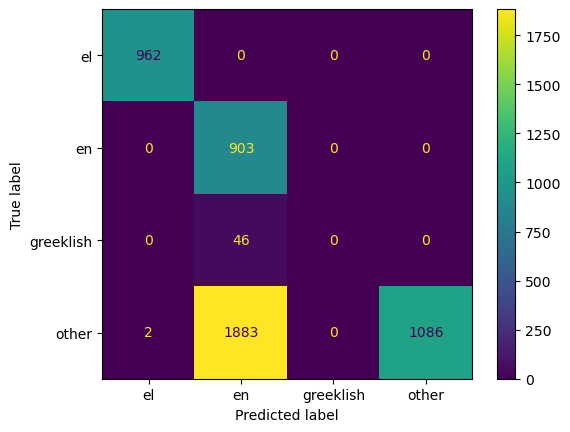

In [178]:
regex_model = RegexClassifier(include_greeklish=True).fit(data_train.text, y_train)
regex_res = regex_model.predict(data_test.text)
get_statistics(y_test, regex_res)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


with warnings.catch_warnings():
    # ignore warnings about deprecated methods in libraries
    warnings.simplefilter("ignore")

    lr = LogisticRegression(max_iter=1000)
    res = cross_val_res(lr, x_train, y_train)
    print(f"Logistic Regression mean macro F1-score {res[0]:.4f}, std: {res[1]:.4f}")

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lr = LogisticRegression(max_iter=1000).fit(x_train, y_train)
    lr_res = lr.predict(x_test)

get_statistics(y_test, lr_res)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest_model = RandomForestClassifier(n_estimators=50, 
                                      n_jobs=-1, 
                                      criterion="entropy")
res = cross_val_res(forest_model, x_train, y_train, cv=3)
print(f"Random Forest mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest_model = RandomForestClassifier(n_estimators=100, 
                                      n_jobs=-1, 
                                      criterion="entropy", 
                                      verbose=1).fit(x_train, y_train)
forest_pred = forest_model.predict(x_test)
get_statistics(y_test, forest_pred)

### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ada_model = AdaBoostClassifier(n_estimators=50)
res = cross_val_res(ada_model, x_train, y_train, cv=3)
print(f"AdaBoost mean macro F1: {res[0]:.4f}, std: {res[1]:.4f}")

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=100).fit(x_train, y_train)
ada_pred = ada_model.predict(x_test)
get_statistics(y_test, ada_pred)

In [ ]:
missed = y_test != ada_pred
pd.DataFrame({"predicted": ada_pred[missed], "actual": data_test[missed].labels, "text": data_test[missed].text})

In [ ]:
missed = y_test != forest_pred
pd.DataFrame({"predicted": forest_pred[missed], "actual": data_test[missed].labels, "text": data_test[missed].text})

In [83]:
print(f"Notebook executed in {int((time()-start)// 60)} minutes and {(time()-start) % 60:.1f} seconds")

Notebook executed in 23 minutes and 59.4 seconds
